In [19]:
calname = 'et_cal11'
ksat = np.loadtxt('/RHESSys/jemez/scripts/%s_ksat.txt'%calname)
m = np.loadtxt('/RHESSys/jemez/scripts/%s_m.txt'%calname)
rd = np.loadtxt('/RHESSys/jemez/scripts/%s_rd.txt'%calname)
sd = np.loadtxt('/RHESSys/jemez/scripts/%s_sd.txt'%calname)
gs = np.loadtxt('/RHESSys/jemez/scripts/%s_gs.txt'%calname)
p_surf = np.loadtxt('/RHESSys/jemez/scripts/%s_p0.txt'%calname)
pdecay = np.loadtxt('/RHESSys/jemez/scripts/%s_pdecay.txt'%calname)

In [21]:
df = pd.DataFrame({'ksat':ksat,'m':m,'rd':rd,'gs':gs,'p0':p_surf,'pdecay':pdecay,'sd':sd, \
'idx':np.arange(0,50000)})

In [1]:
fl = '/RHESSys/jemez/scripts/nohup_output.txt'
with open(fl) as f:
    lines = f.readlines()

In [11]:
idx = []
time = []
ct = 0

for ln in lines:
    if ln.split('=')[0] == 'time cost ':
        time.append(int(ln.split('=')[1].split(' ')[1]))
        idx.append(ct)
                   
        ct+=1
    else:
        continue

In [23]:
tmp = pd.DataFrame({'idx':idx,'time':np.array(time)/60.})

In [24]:
dat = pd.merge(left=df,right=tmp,on='idx',how='inner')

In [29]:
dat.head()

,gs,idx,ksat,m,p0,pdecay,rd,sd,time
0,0.0075,0,15.4,13.261,0.957,533.630,2.13,21.26,0
1,0.0021,1,130.9,7.336,0.531,5565.276,4.14,13.25,0
2,0.0024,2,94.4,12.332,0.860,3050.230,2.73,11.14,0
3,0.0021,3,65.8,18.809,0.166,1326.397,6.46,22.70,0
4,0.0046,4,20.3,13.547,0.313,1429.843,6.86,19.96,0


In [36]:
tmp = dat.loc[dat.rd>dat.sd]

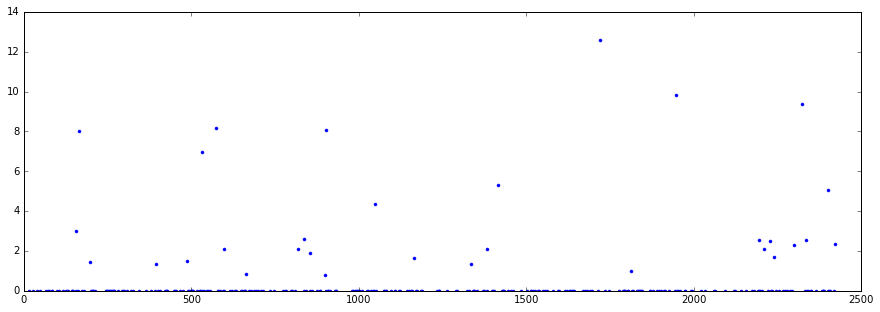

In [37]:
plt.figure(figsize=(15,5))
plt.plot(tmp.idx,tmp.time,'.')

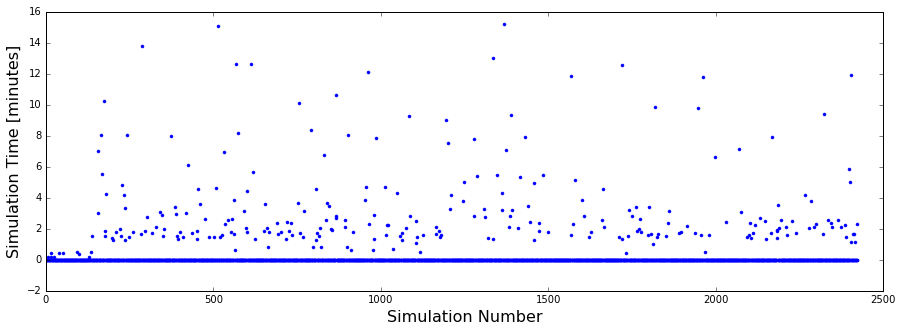

In [42]:
plt.figure(figsize=(15,5))
plt.plot(dat.idx,dat.time,'.')
plt.ylim(-2,16)
plt.xlabel('Simulation Number', fontsize=16)
plt.ylabel('Simulation Time [minutes]', fontsize=16)

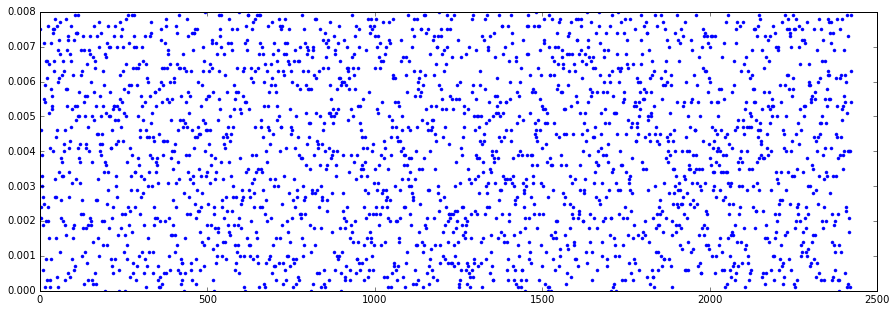

In [43]:
plt.figure(figsize=(15,5))
plt.plot(dat.idx,dat.gs,'.')

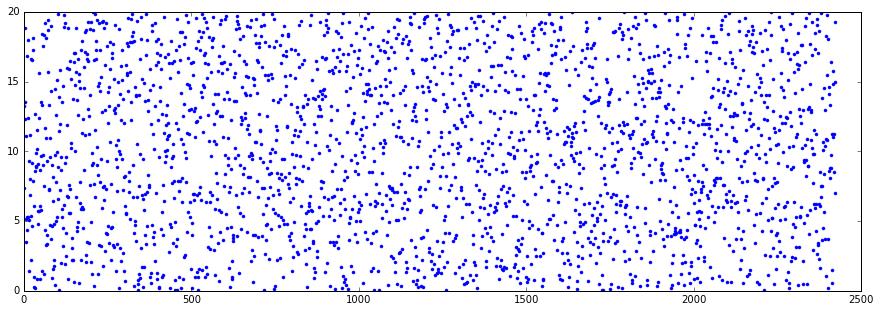

In [45]:
plt.figure(figsize=(15,5))
plt.plot(dat.idx,dat.m,'.')

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(dat.idx,dat.ksat,'.')

In [3]:
ln = 'time cost = 0 seconds\n'

In [6]:
ln.split('=')[1].split(' ')[1]

'0'

In [46]:
dat.tail()

,gs,idx,ksat,m,p0,pdecay,rd,sd,time
2419,0.0040,2419,104.0,8.489,0.518,6897.846,6.88,27.16,0.000000
2420,0.0001,2420,15.5,11.247,0.932,6769.725,6.33,5.18,0.000000
2421,0.0063,2421,148.8,19.293,0.518,9855.372,7.75,16.49,0.000000
2422,0.0079,2422,90.6,14.943,0.006,30.614,4.67,24.53,0.000000
2423,0.0054,2423,145.9,6.985,0.381,9779.610,5.47,2.04,2.333333


In [47]:
tmp = dat.loc[dat.time!=0]

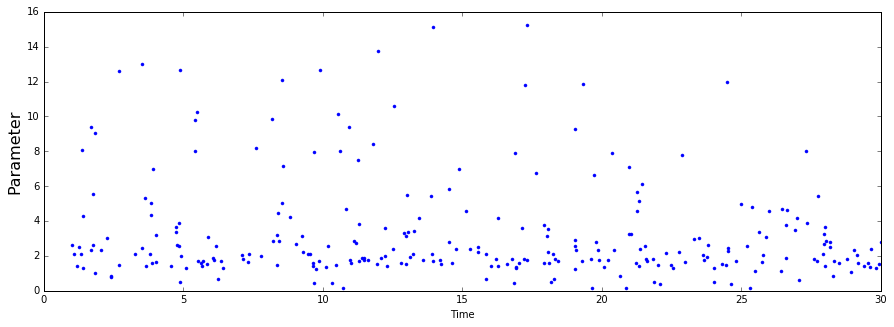

In [57]:
plt.figure(figsize=(15,5))
plt.plot(tmp.sd,tmp.time,'.')
plt.ylabel('Parameter', fontsize=16)
plt.xlabel('Time')

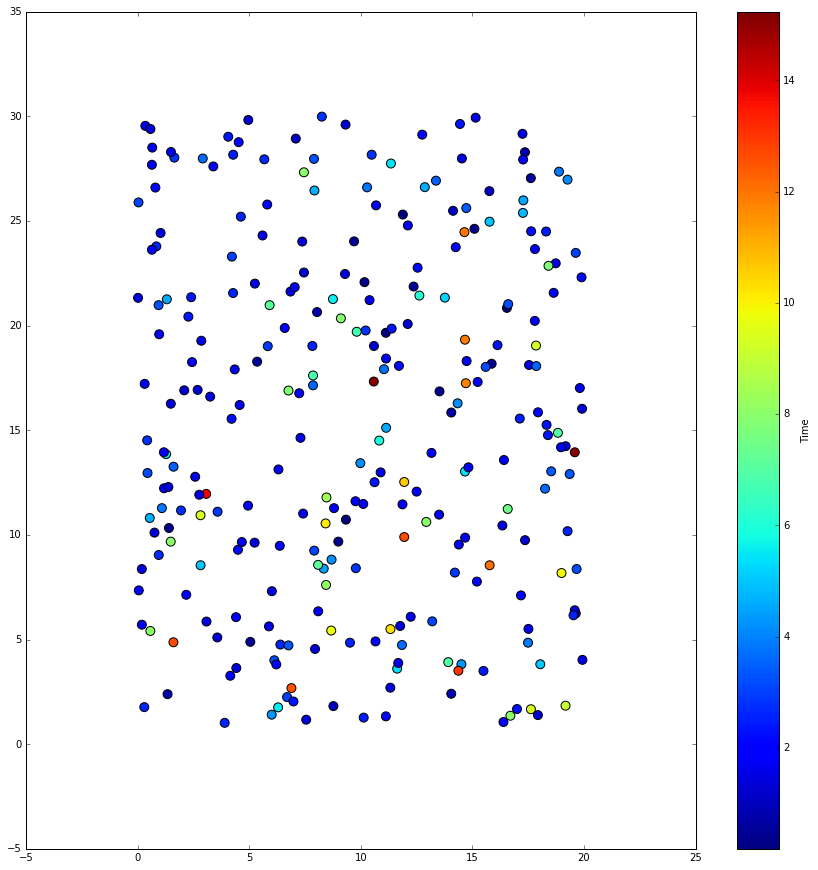

In [74]:
plt.figure(figsize=(15,15))
plt.scatter(tmp.m,tmp.sd,s=80,c=tmp.time)
plt.colorbar(label='Time')

In [76]:
import itertools

In [79]:
cols = ['gs','ksat','p0','pdecay','rd','sd']
combos = list(itertools.combinations(cols,2))

In [81]:
combos

[('gs', 'ksat'),
 ('gs', 'p0'),
 ('gs', 'pdecay'),
 ('gs', 'rd'),
 ('gs', 'sd'),
 ('ksat', 'p0'),
 ('ksat', 'pdecay'),
 ('ksat', 'rd'),
 ('ksat', 'sd'),
 ('p0', 'pdecay'),
 ('p0', 'rd'),
 ('p0', 'sd'),
 ('pdecay', 'rd'),
 ('pdecay', 'sd'),
 ('rd', 'sd')]

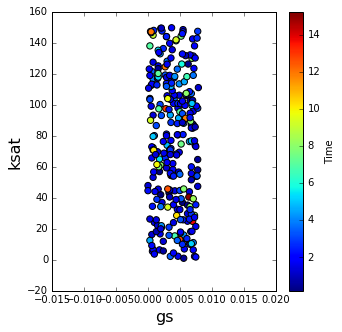

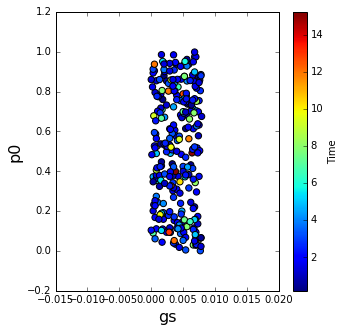

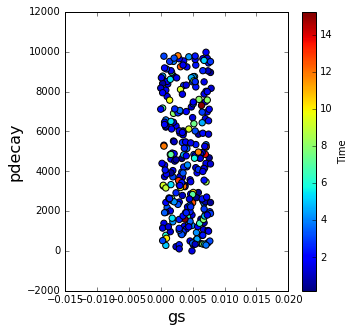

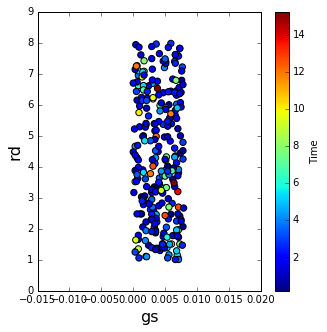

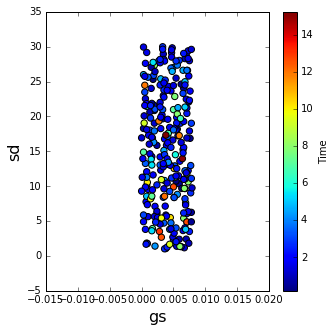

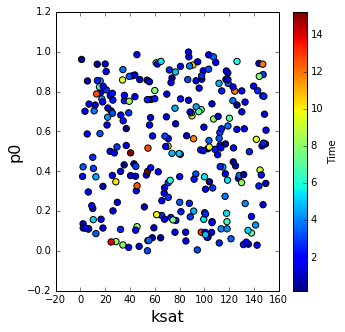

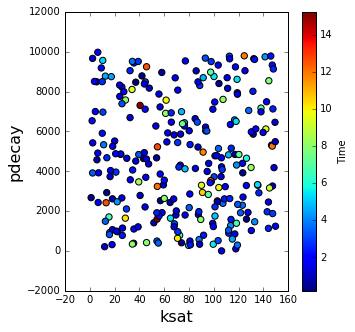

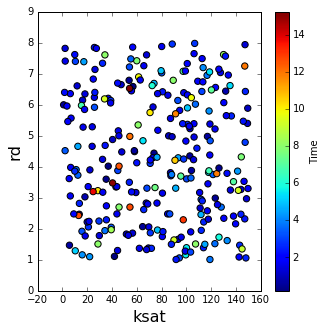

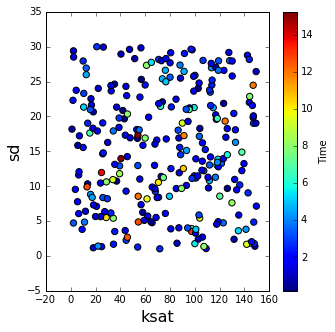

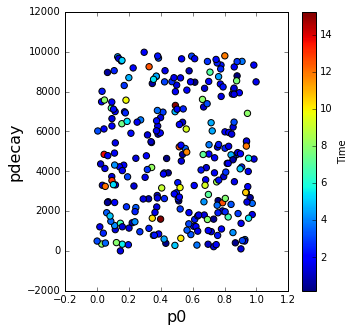

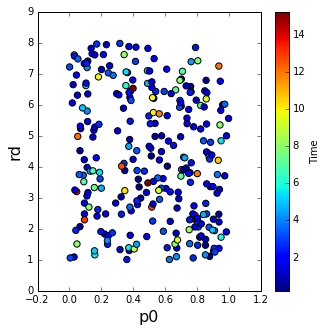

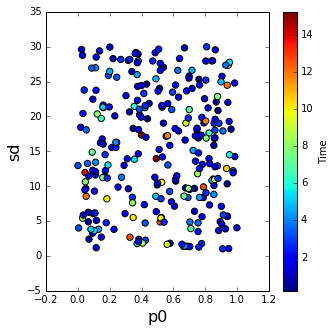

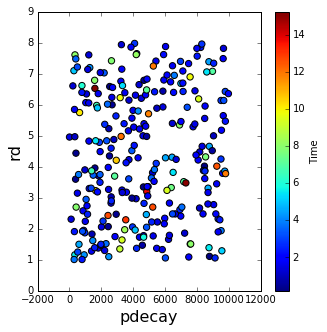

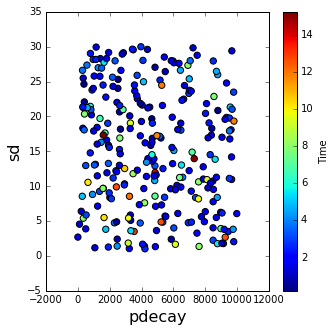

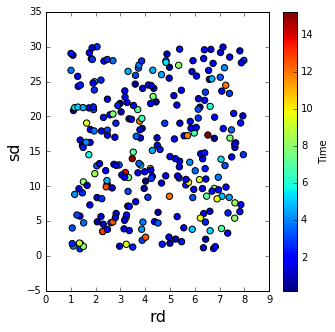

In [80]:
for combo in combos:
    plt.figure(figsize=(5,5))
    plt.scatter(tmp[combo[0]],tmp[combo[1]],s=40,c=tmp.time)
    plt.xlabel(combo[0], fontsize=16)
    plt.ylabel(combo[1], fontsize=16)
    plt.colorbar(label='Time')